Air Quality Summary:
         count       mean       std    min     25%    50%   75%    max
Season                                                                
Summer  1007.0  26.133237  5.274665  12.99  22.735  26.51  29.4  44.31
Winter  1007.0  26.133237  5.274665  12.99  22.735  26.51  29.4  44.31


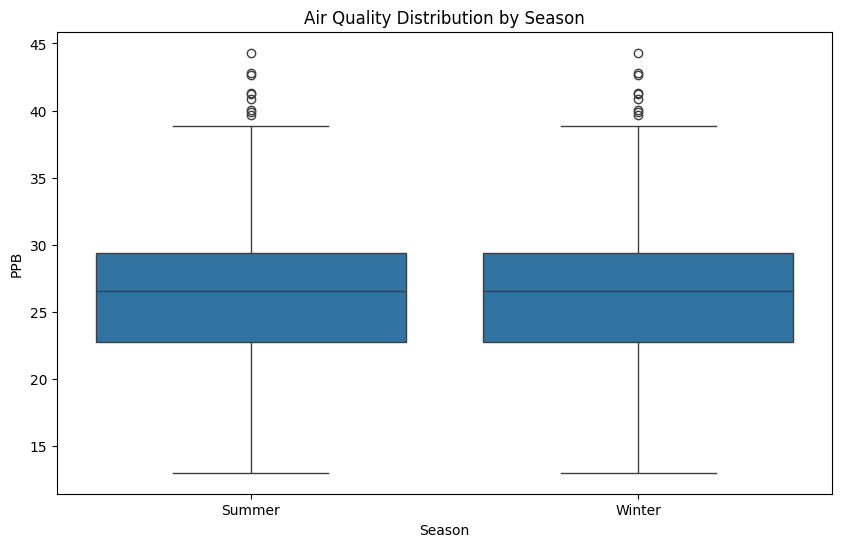

ANOVA F-statistic: 3.006333957376915, P-value: 0.08318584323271133


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load air quality data
annual_air = pd.read_csv('../Data/Project_Data/Annual_Air.csv')
summer_air = pd.read_csv('../Data/Project_Data/Summer_Air.csv')
winter_air = pd.read_csv('../Data/Project_Data/Winter_Air.csv')

# Combine datasets for seasonal analysis
annual_air['Season'] = 'Annual'
summer_air['Season'] = 'Summer'
winter_air['Season'] = 'Winter'

air_quality = pd.concat([summer_air, winter_air])

# Summary statistics
print("Air Quality Summary:")
print(air_quality.groupby("Season")["Data Value"].describe())

# Plot distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x="Season", y="Data Value", data=air_quality)
plt.title("Air Quality Distribution by Season")
plt.ylabel("PPB")
plt.xlabel("Season")
plt.show()

# Test for seasonal differences using ANOVA
from scipy.stats import f_oneway

annual = annual_air["Data Value"]
summer = summer_air["Data Value"]

f_stat, p_value = f_oneway(annual, summer)
print(f"ANOVA F-statistic: {f_stat}, P-value: {p_value}")


Income Data Summary:
count       108.000000
mean      99283.944176
std       40010.858695
min       38847.016240
25%       51577.123708
50%      113588.527010
75%      129536.579937
max      170331.092000
Name: Data, dtype: float64
Top 5 Neighborhoods by Median Income:
                                Location  Household Type  TimeFrame  \
10              Financial District (CD1)  All Households       2019   
13      Greenwich Village and Soho (CD2)  All Households       2019   
49  Stuyvesant Town and Turtle Bay (CD6)  All Households       2019   
9               Financial District (CD1)  All Households       2018   
14      Greenwich Village and Soho (CD2)  All Households       2018   

   DataFormat          Data  Fips  
10    Dollars  170331.09200   101  
13    Dollars  170331.09200   102  
49    Dollars  162354.24355   106  
9     Dollars  158255.79521   101  
14    Dollars  158255.79521   102  
Neighborhoods with the highest income variability:
Location
Financial District (CD1)   

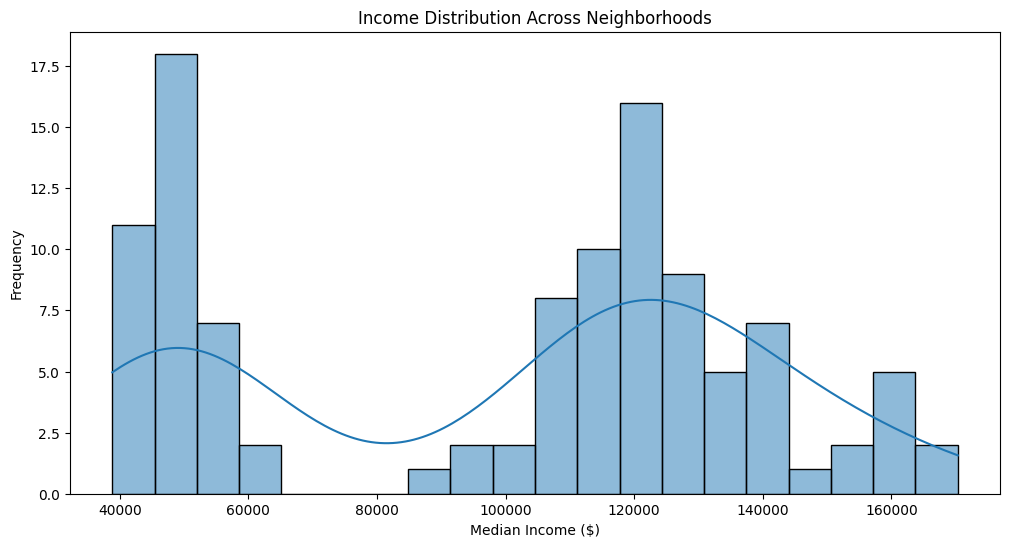

In [3]:
# Load neighborhood data
income_data = pd.read_csv('../Data/Project_Data/Filtered_Neighborhoods.csv')

# Summary statistics for income
print("Income Data Summary:")
print(income_data["Data"].describe())

# Top 5 richest neighborhoods
top_neighborhoods = income_data.nlargest(5, "Data")
print("Top 5 Neighborhoods by Median Income:")
print(top_neighborhoods)

# Income variability
income_variance = income_data.groupby("Location")["Data"].std().sort_values(ascending=False)
print("Neighborhoods with the highest income variability:")
print(income_variance.head(5))

# Visualize income distribution
plt.figure(figsize=(12, 6))
sns.histplot(income_data["Data"], kde=True, bins=20)
plt.title("Income Distribution Across Neighborhoods")
plt.xlabel("Median Income ($)")
plt.ylabel("Frequency")
plt.show()


Pearson Correlation: 0.2184857446326363 (p=7.88305990312049e-151)
Spearman Correlation: 0.1691206254490835 (p=2.7790554743084344e-90)
Linear Regression: Slope=2.905056533867013e-05, Intercept=23.452903612568377, R-squared=0.04773602060767758, P-value=7.883059903113673e-151


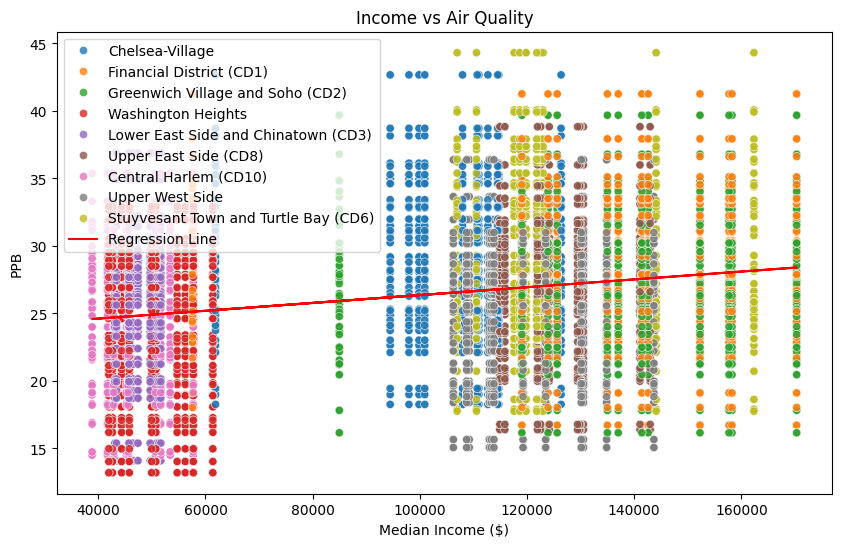

In [4]:
# Merge air quality and income data
merged_data = air_quality.merge(income_data, left_on="Geo Place Name", right_on="Location", how="inner")

# Correlation between income and air quality
from scipy.stats import pearsonr, spearmanr

pearson_corr, pearson_p = pearsonr(merged_data["Data"], merged_data["Data Value"])
spearman_corr, spearman_p = spearmanr(merged_data["Data"], merged_data["Data Value"])

print(f"Pearson Correlation: {pearson_corr} (p={pearson_p})")
print(f"Spearman Correlation: {spearman_corr} (p={spearman_p})")

# Regression analysis
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(merged_data["Data"], merged_data["Data Value"])
print(f"Linear Regression: Slope={slope}, Intercept={intercept}, R-squared={r_value**2}, P-value={p_value}")

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Data", y="Data Value", data=merged_data, hue="Geo Place Name", palette="tab10", alpha=0.8)
plt.plot(merged_data["Data"], slope * merged_data["Data"] + intercept, color="red", label="Regression Line")
plt.title("Income vs Air Quality")
plt.xlabel("Median Income ($)")
plt.ylabel("PPB")
plt.legend()
plt.show()


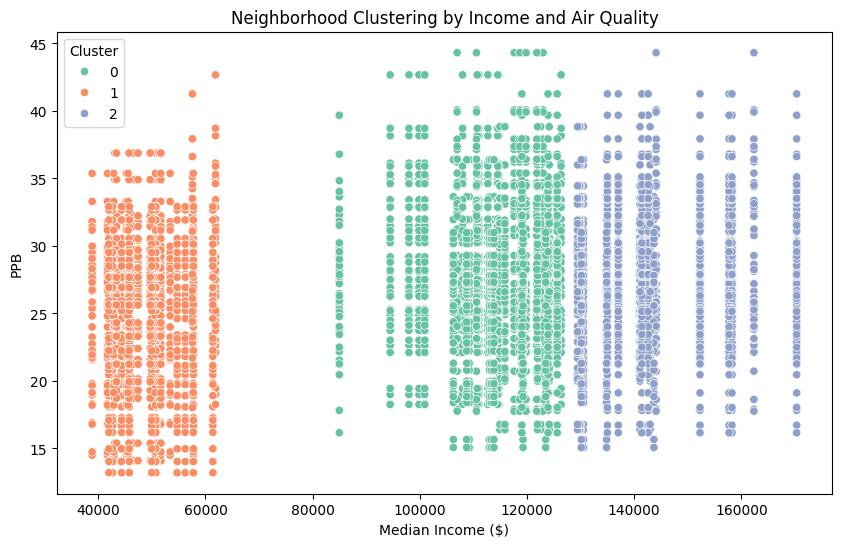

In [5]:
from sklearn.cluster import KMeans

# Prepare data for clustering
cluster_data = merged_data[["Data", "Data Value"]].dropna()

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42).fit(cluster_data)
merged_data["Cluster"] = kmeans.labels_

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Data", y="Data Value", hue="Cluster", data=merged_data, palette="Set2")
plt.title("Neighborhood Clustering by Income and Air Quality")
plt.xlabel("Median Income ($)")
plt.ylabel("PPB")
plt.show()


In [6]:
# Define thresholds for income
high_income = merged_data[merged_data["Data"] >= merged_data["Data"].median()]
low_income = merged_data[merged_data["Data"] < merged_data["Data"].median()]

# Perform t-test
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(high_income["Data Value"], low_income["Data Value"])
print(f"T-test: T-statistic={t_stat}, P-value={p_val}")


T-test: T-statistic=20.689221938298054, P-value=1.0883355625034046e-93


    Time Period       mean  median       std
0          2008  33.115789   31.95  3.706871
1          2009  29.885789   28.66  3.568738
2          2010  30.284737   29.30  3.500304
3          2011  28.016842   27.08  3.625999
4          2012  27.349474   26.50  3.396813
5          2013  26.029474   25.10  3.499385
6          2015  24.277895   23.86  2.668237
7          2017  24.063684   23.39  2.496896
8          2018  22.954737   22.22  2.426145
9          2019  21.298947   20.80  2.724210
10         2020  20.183684   19.62  1.731625
11         2021  19.662632   19.17  1.939868


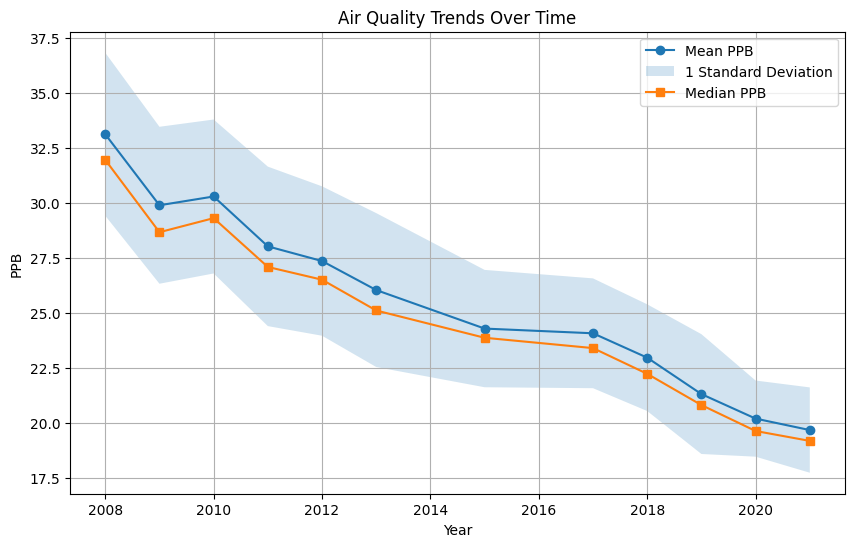

In [9]:
# Ensure time column exists in the dataset
annual_air = pd.read_csv('../Data/Project_Data/Annual_Air.csv')

# Add a 'Year' column if not already present
annual_air['Time Period'] = pd.to_datetime(annual_air['Start_Date']).dt.year

# Group by year and calculate mean and median PPB
yearly_trends = annual_air.groupby('Time Period')["Data Value"].agg(['mean', 'median', 'std']).reset_index()
print(yearly_trends)

# Plot the yearly trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_trends['Time Period'], yearly_trends['mean'], marker='o', label='Mean PPB')
plt.fill_between(
    yearly_trends['Time Period'],
    yearly_trends['mean'] - yearly_trends['std'],
    yearly_trends['mean'] + yearly_trends['std'],
    alpha=0.2, label='1 Standard Deviation'
)
plt.plot(yearly_trends['Time Period'], yearly_trends['median'], marker='s', label='Median PPB')
plt.title("Air Quality Trends Over Time")
plt.xlabel("Year")
plt.ylabel("PPB")
plt.legend()
plt.grid()
plt.show()


Annual Trends for mcg/m³:
    Year       mean  median       std
0   2008  10.977801   10.75  1.218084
1   2009  10.069574    9.89  1.158651
2   2010  10.585390   10.42  1.056901
3   2011   9.440071    9.18  1.109610
4   2012   9.135248    8.77  1.141946
5   2013   9.402199    9.12  1.102017
6   2015   8.460851    8.34  1.138168
7   2017   7.737801    7.52  0.825777
8   2018   7.384326    7.16  0.904209
9   2019   7.012553    6.70  1.055083
10  2020   6.321702    6.12  0.686747
11  2021   6.761277    6.60  0.561406


/var/folders/pt/8gz0xfpj71bdsdx25s8y7nfm0000gn/T/ipykernel_45235/275763857.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcg_data['Year'] = pd.to_datetime(mcg_data['Start_Date']).dt.year


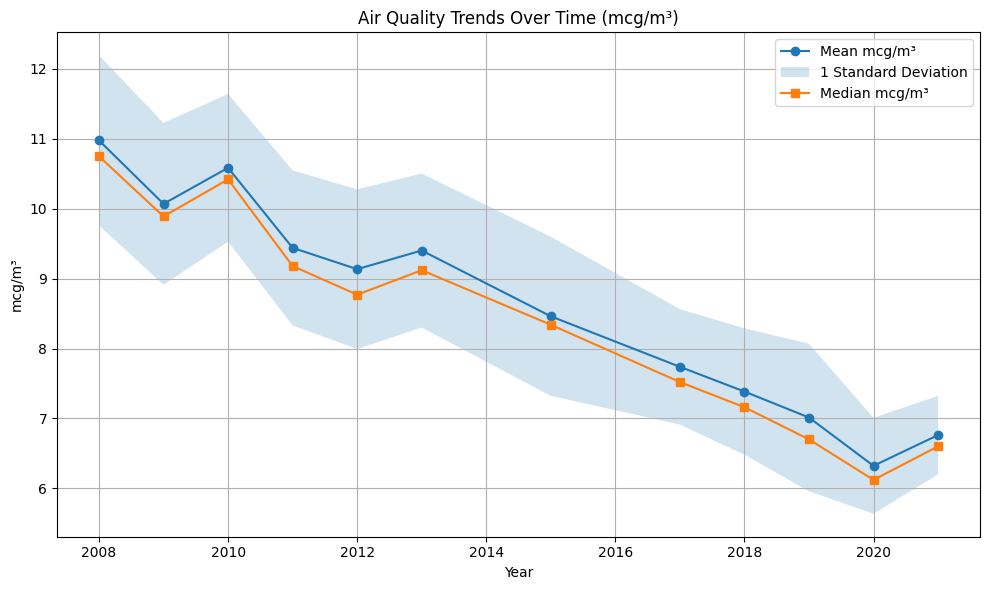

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('../Data/Air_Quality.csv')

# Filter for mcg/m³ data and annual averages
mcg_data = data[(data["Measure Info"] == "mcg/m3") & (data["Time Period"].str.contains("Annual Average"))]

# Extract the year from the Start_Date or Time Period column
mcg_data['Year'] = pd.to_datetime(mcg_data['Start_Date']).dt.year

# Group by year and calculate mean and standard deviation
annual_mcg_trends = mcg_data.groupby('Year')["Data Value"].agg(['mean', 'median', 'std']).reset_index()

# Display the yearly summary
print("Annual Trends for mcg/m³:")
print(annual_mcg_trends)

# Plot the yearly trends
plt.figure(figsize=(10, 6))
plt.plot(annual_mcg_trends['Year'], annual_mcg_trends['mean'], marker='o', label='Mean mcg/m³')
plt.fill_between(
    annual_mcg_trends['Year'],
    annual_mcg_trends['mean'] - annual_mcg_trends['std'],
    annual_mcg_trends['mean'] + annual_mcg_trends['std'],
    alpha=0.2, label='1 Standard Deviation'
)
plt.plot(annual_mcg_trends['Year'], annual_mcg_trends['median'], marker='s', label='Median mcg/m³')
plt.title("Air Quality Trends Over Time (mcg/m³)")
plt.xlabel("Year")
plt.ylabel("mcg/m³")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
